<a href="https://colab.research.google.com/github/Hamza-Ali0237/PyTorch-Projects/blob/main/Beginner/PyTorch-TabularData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# Iris Dataset

In [ ]:
# Import Libraries
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import StepLR

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from torchmetrics import Accuracy, ConfusionMatrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Data
iris_data = load_iris()

X = iris_data.data
y = iris_data.target

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (150, 4)
Shape of y: (150,)


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y
)

In [ ]:
# Normalize Data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Custom Dataset Class
class IrisDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype = torch.float32)
    self.y = torch.tensor(y, dtype = torch.long)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [ ]:
# Initialize DataLoaders
train_data = IrisDataset(X_train, y_train)
test_data = IrisDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size = 16, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 16)

In [ ]:
# Feedforward Neural Network Class
class FeedforwardNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(FeedforwardNN, self).__init__()

    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)

    return x

In [ ]:
# Intanstiate Model, Loss, Optimizer, and LR Scheduler
model = FeedforwardNN(input_size = 4, hidden_size = 16, num_classes = 3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

scheduler = StepLR(optimizer, step_size = 10, gamma = 0.5)

In [ ]:
# Training Loop
EPOCHS = 50
train_loss = []

for i in range(EPOCHS):
  model.train()
  epoch_loss = 0.0

  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
    epoch_loss /= len(train_loader)
    train_loss.append(epoch_loss)

    current_lr = optimizer.param_groups[0]['lr']

  print(f"Epoch {i+1}/{EPOCHS}, Loss: {epoch_loss:.4f}, LR: {current_lr:.6f}")

  scheduler.step()

Epoch 1/50, Loss: 0.1247, LR: 0.010000
Epoch 2/50, Loss: 0.0681, LR: 0.010000
Epoch 3/50, Loss: 0.0673, LR: 0.010000
Epoch 4/50, Loss: 0.0574, LR: 0.010000
Epoch 5/50, Loss: 0.0381, LR: 0.010000
Epoch 6/50, Loss: 0.0432, LR: 0.010000
Epoch 7/50, Loss: 0.0502, LR: 0.010000
Epoch 8/50, Loss: 0.0607, LR: 0.010000
Epoch 9/50, Loss: 0.0349, LR: 0.010000
Epoch 10/50, Loss: 0.0458, LR: 0.010000
Epoch 11/50, Loss: 0.0237, LR: 0.005000
Epoch 12/50, Loss: 0.0241, LR: 0.005000
Epoch 13/50, Loss: 0.0367, LR: 0.005000
Epoch 14/50, Loss: 0.0309, LR: 0.005000
Epoch 15/50, Loss: 0.0246, LR: 0.005000
Epoch 16/50, Loss: 0.0304, LR: 0.005000
Epoch 17/50, Loss: 0.0505, LR: 0.005000
Epoch 18/50, Loss: 0.0160, LR: 0.005000
Epoch 19/50, Loss: 0.0198, LR: 0.005000
Epoch 20/50, Loss: 0.0163, LR: 0.005000
Epoch 21/50, Loss: 0.0137, LR: 0.002500
Epoch 22/50, Loss: 0.0376, LR: 0.002500
Epoch 23/50, Loss: 0.0157, LR: 0.002500
Epoch 24/50, Loss: 0.0249, LR: 0.002500
Epoch 25/50, Loss: 0.0150, LR: 0.002500
Epoch 26/

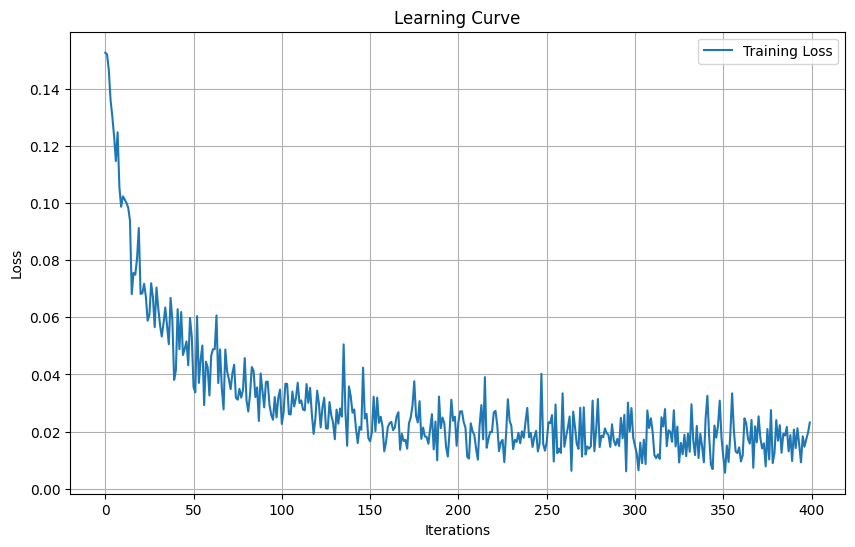

In [ ]:
# Plot Learning Curves
plt.figure(figsize = (10, 6))
plt.plot(train_loss, label = 'Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Instantiate Accuracy Metric
accuracy = Accuracy(
    task = "multiclass",
    num_classes = 3,
    average = "macro"
)

# Instantiate Confusion Matrix
conf_mat = ConfusionMatrix(
    task = "multiclass",
    num_classes = 3
)

Test Accuracy: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

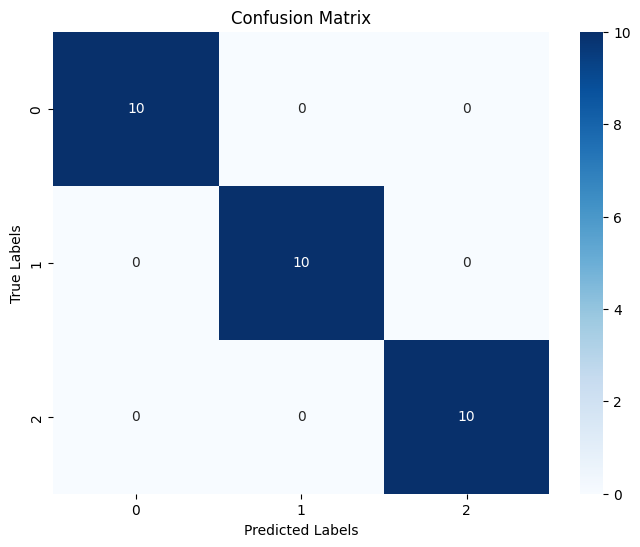

In [ ]:
# Evaluation
with torch.no_grad():
  for inputs, labels in test_loader:
    outputs = model(inputs)
    prediction = torch.argmax(outputs, dim=1)
    accuracy(prediction, labels)
    conf_mat(prediction, labels)

accuracy_score = accuracy.compute()
conf_matrix = conf_mat.compute()

print(f"Test Accuracy: {accuracy_score}")

# Plot Confuion Matrix
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Wine Quality Dataset

In [3]:
# Import Libraries
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from torchmetrics import Accuracy, ConfusionMatrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load Dataset
df_red = pd.read_csv("winequality-red.csv", sep = ";")
df_white = pd.read_csv("winequality-white.csv", sep = ";")

df = pd.concat([df_red, df_white])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Train-Test Split
X = df.drop('quality', axis = 1).values
y = df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y
)

# Normalize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)